In [37]:
import sys
def sizeof_fmt(size):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(size) < 1024.0:
            return f"{size:3.1f} {unit}B"
        size /= 1024.0
    return f"{size:.1f} YiB"

print(f'TOTAL SIZE: {sizeof_fmt(sum( (sys.getsizeof(value) for value in locals().values() ))):>10}')
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()), key= lambda x: -x[1])[:10]:
    print(f'{name:>10}: {sizeof_fmt(size):>10}')


TOTAL SIZE:   18.3 KiB
       _i1:    824.0 B
       _i2:    824.0 B
      _i17:    693.0 B
       _i5:    579.0 B
      _i10:    577.0 B
       _i4:    575.0 B
       _i7:    563.0 B
       _i6:    555.0 B
       _i8:    555.0 B
      _i21:    547.0 B
time: 1.3 ms (started: 2021-12-16 17:40:30 +00:00)


In [3]:
import geopandas as gp
import pandas as pd
import json
import numpy as np

time: 381 ms (started: 2021-12-13 16:14:18 +00:00)


In [4]:
# !pip3 install elasticsearch-dsl
# from elasticsearch_dsl import Search
from elasticsearch import Elasticsearch, helpers
es = Elasticsearch(['https://3d6a9dd50c7c49c9ab5d23b6891bc03e.us-central1.gcp.cloud.es.io:9243'], 
                    http_auth=('elastic', 'WMzYk5RXyzE7MRShwPVwHzPX'), timeout=30)


time: 52 ms (started: 2021-12-13 16:14:21 +00:00)


In [5]:
regridcols = ['cbg', 'lat', 'lon', 'func']

time: 284 µs (started: 2021-12-13 16:14:21 +00:00)


In [6]:
STATE_FIPS_LENGTH = 2
COUNTY_FIPS_LENGTH = 5
TRACT_FIPS_LENGTH = 11
BLOCKGROUP_FIPS_LENGTH = 12
CENSUSBLOCK_FIPS_LENGTH = 15

time: 360 µs (started: 2021-12-13 16:14:21 +00:00)


In [7]:
STATE_FIPS_DICT_52 = { '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', 
                      '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', 
                      '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', 
                      '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', 
                      '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', 
                      '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', 
                      '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE', 
                      '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', 
                      '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', 
                      '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', 
                      '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', 
                      '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', 
                      '54': 'WV', '55': 'WI', '56': 'WY', '72': 'PR'}
STATE_LIST_52 = list(sorted(STATE_FIPS_DICT_52.keys()))
R_STATE_FIPS_DICT_52 = {value : key for (key, value) in STATE_FIPS_DICT_52.items()}

time: 785 µs (started: 2021-12-13 16:14:22 +00:00)


#### MEMORY ALLOCATION NOTE: READING all 52 state TIGER SHP will consume all RAM! Can only read and process state by state!

#### A little jupyter test: running jupyter in background, then run a cell. Now can close the browser window. Once visit this ipynb again, the cell will still be running until completion;

In [ ]:
import time
print('start')
x=0
time.sleep(5) # Cmd+S, and close the window. Next time visit the ipynb, x=5 as expected
print('stop')
x=5

### lbcs_function = 0 iff Regrid null or N/A. Else is the thousand digit:

https://support.regrid.com/articles/lbcs-keys/#function-classifications

- 0 - N/A i.e. Null
- 1[000] - Residence or accommodation functions
- 2[000] - General sales or services
- 3[000] - Manufacturing and wholesale trade
- 4[000] - Transportation, communication, information, and utilities
- 5[000] - Arts, entertainment, and recreation
- 6[000] - Education, public admin., health care, and other inst.
- 7[000] - Construction-related businesses
- 8[000] - Mining and extraction establishments
- 9[000] - Agriculture, forestry, fishing and hunting

## Parsing speeds

In [131]:
# la = pd.read_json('large_file') # 3 min = MemoryError: 
# la1 = gp.read_file(large_file) # TAKING FOREVER! 20min+ and still running

time: 240 µs (started: 2021-12-08 03:07:32 +00:00)


In [9]:
# !pip3 install cysimdjson
# import cysimdjson as cjson
# parser = cjson.JSONParser()
# # laC = parser.parse_string(large_file)
# # laC = parser.parse(large_file)
# laC.json_parsed(['features'])[:3]


     |████████████████████████████████| 1.3 MB 3.3 MB/s            
time: 1.93 s (started: 2021-12-07 22:51:48 +00:00)


### pandas read_json (processed jq) = 100x geopandas read_file (zip)

In [14]:
laP_test = pd.read_json('~/jsons/wy_laramie.json') # 180ms

time: 94 ms (started: 2021-12-09 01:00:37 +00:00)


In [15]:
laG_test = gp.read_file('~/regrid-bucket/wy_laramie.json') # 18s

time: 19.9 s (started: 2021-12-09 01:00:38 +00:00)


In [19]:
zfile = 'regrid-bucket/ca_orange.geojson.zip'  
jfile = 'regrid-bucket/ca_orange.json' # 2.2G
jqfile = 'jsons/ca_orange.json' # processed into JSONL 

time: 398 µs (started: 2021-12-09 01:03:23 +00:00)


In [21]:
jsonl


'/home/nhat/jsons/vt_addison.json'

time: 1.8 ms (started: 2021-12-13 16:30:35 +00:00)


In [ ]:
df = gp.read_file(zfile) # 5min
# df = pd.read_json(jfile) # CANNOT PARSE the raw geojson
df = pd.read_json(jqfile) # 5s


# Combine county JSONL files into state DataFrame

# MICHIGAN: BUG ALERT!

In [24]:
a = pd.read_json('extras/geoid_c.json', orient='index')
a.shape # 3058
b = pd.read_json('extras/geoid_c_r.json', orient='index')
b.shape # 3059 {mi_wayne": "26163", "mi_wayne_detroit": "26163"}
a = a.reset_index()
b = b.reset_index()
set(b['index'].unique()) - set(a[0].unique())


(3059, 1)

time: 9.5 ms (started: 2021-12-11 04:02:56 +00:00)


In [10]:
from subprocess import getoutput

# master dict: state- county jsons
JSONL = {}
for statefips, abbr in STATE_FIPS_DICT_52.items():
    state_abbrv = abbr.lower()
    jsons = getoutput(f'ls /home/nhat/jsons/{state_abbrv}_*.json').split()
    JSONL[statefips] = jsons

time: 270 ms (started: 2021-12-11 02:37:03 +00:00)


In [157]:
statefips = '26' # MICHIGAN, with overlapping GEOID for {mi_wayne": "26163", "mi_wayne_detroit": "26163"}
# for NY: 20 seconds to assemble master frame
# state = 'ny' 

frames = []
for jsonl in JSONL[statefips]:
    # TODO here: handle empty jsonl (no valid parcel address)
    df = pd.read_json(jsonl)
    if not df.empty:
        df['cbg'] = df['cbg'].astype(str).str.zfill(BLOCKGROUP_FIPS_LENGTH)
        df['func'] = (df['func'].fillna(0) // 1000).astype(int)
        frames.append(df)

state_df = pd.concat(frames)

time: 11.1 s (started: 2021-12-13 08:44:34 +00:00)


In [109]:
jsonl

'/home/nhat/jsons/mi_wayne_detroit.json'

time: 1.38 ms (started: 2021-12-13 08:24:03 +00:00)


In [158]:
state_df.shape # 5million NY, ~4mil MI

(3882807, 4)

time: 1.9 ms (started: 2021-12-13 08:44:53 +00:00)


In [112]:
state_df['geoidC'] = state_df['cbg'].str[:5]

time: 951 ms (started: 2021-12-13 08:26:14 +00:00)


In [113]:
state_df.head()

,cbg,lat,lon,func,geoidC
0,260019704002,44.611378,-83.543687,0,26001
1,260019705003,44.532802,-83.773869,0,26001
2,260019705003,44.538033,-83.731777,0,26001
3,260019701001,44.819963,-83.330812,0,26001
4,260019701001,44.806737,-83.347441,0,26001


time: 5.52 ms (started: 2021-12-13 08:26:22 +00:00)


In [154]:
wayne = pd.read_json('/home/nhat/jsons/mi_wayne.json')
wayne['cbg'] = wayne['cbg'].astype(str).str.zfill(BLOCKGROUP_FIPS_LENGTH)
wayne['func'] = (wayne['func'].fillna(0) // 1000).astype(int)

detroit = pd.read_json('/home/nhat/jsons/mi_wayne_detroit.json')
detroit['cbg'] = detroit['cbg'].astype(str).str.zfill(BLOCKGROUP_FIPS_LENGTH)
detroit['func'] = (detroit['func'].fillna(0) // 1000).astype(int)

# find rows with overlapping (lat, lon) detroit vs wayne
overlaps = pd.merge(detroit, wayne,  how='inner', left_on=['lat','lon'], right_on = ['lat','lon'])
len(overlaps) # 0: good! no overlapping parcels


# # test: finding overlaps using merge left_on right_on 2 columns lat/lon
# t1 = detroit.head().copy()
# t2 = wayne.head().copy()
# t1.iloc[:2] = t2.iloc[:2]
# toverlaps = pd.merge(t1, t2,  how='inner', left_on=['lat','lon'], right_on = ['lat','lon'])
# toverlaps


time: 2.66 s (started: 2021-12-13 08:43:35 +00:00)


## ES geoshape query : SUPER SLOW
https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-geo-shape-query.html#_pre_indexed_shape



In [ ]:
# query_body = {
#     "size": 1,
#     "bool": {
#       "must": {
#         # "match_all": {} # [8ms]
#         "match": { "GEOID_cbg": ""} # this is slower than above: Strange! TODO: test on large scale [10ms]
#       },
#       "filter": {
#         "geo_shape": {
#           "location": {
#             "shape": {
#               "type": "point",
#               "coordinates": []
#             },
#             "relation": "contains"
#           }
#         }
#       }
#     }
# }

In [ ]:
# ^ SUPER SLOW! TAKING more than 1hr already !! FOREVER!!!!

# res = es.get(index='bossdata29', id='290299502001023')
# res['_source']

# res = es.search(index='bossdata02', body=query_body)
# print("Number of hits: ", res['hits']['total']['value'])
# print(res['hits']['hits'][0]["_source"]['GEOID'])

# ### Elasticsearch-DSL-py: https://github.com/elastic/elasticsearch-dsl-py
# class Point():
#     def __init__(self, x, y):
#         self.x, self.y = x, y
#     # x is lat, y is lon
#     def to_dict(self):
#         return {"shape": {"type": "point", "coordinates": [self.x, self.y]}}
# s = Search().filter('geo_shape', location=Point(123, 456))
# s.execute()

## Tiger shp

In [159]:
tiger_url = "https://www2.census.gov/geo/tiger/TIGER2019/TABBLOCK/tl_2019_{}_tabblock10.zip".format(statefips) 
print(f'Reading Tiger shp for state {statefips} {STATE_FIPS_DICT_52[statefips]}')
state_cb = gp.read_file(tiger_url)
state_cb = state_cb[['GEOID10', 'geometry']]
state_cb = state_cb.rename({"GEOID10": "GEOID"}, axis = 1)
state_cb['cbg'] = state_cb['GEOID'].str[:BLOCKGROUP_FIPS_LENGTH]
state_cb.shape
# NY: tiger download takes 25s, NY has about 15 parcels per census block
# MI: tiger download takes: 2min, NY has about 12 parcels per census block

Reading Tiger shp for state 26 MI


(329885, 3)

time: 2min 6s (started: 2021-12-13 08:44:59 +00:00)


In [48]:
state_cb.head(2)

,GEOID,geometry,cbg
0,110010098011001,"POLYGON ((-76.99544 38.83723, -76.99517 38.837...",110010098011
1,110010098011008,"POLYGON ((-77.00057 38.83397, -77.00031 38.834...",110010098011


time: 5.87 ms (started: 2021-12-11 04:39:20 +00:00)


In [164]:
round(len(state_df) / len(state_cb))

12

time: 1.43 ms (started: 2021-12-13 08:51:06 +00:00)


# Standard geopandas sjoin

In [160]:
# # https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html
# # Creating a GeoDataFrame from a DataFrame with coordinates
# NOTE: NY 2min: long time; MI 1.5min
state_geodf =  gp.GeoDataFrame(state_df, geometry=gp.points_from_xy(state_df.lon, state_df.lat, crs=state_cb.crs)) 

time: 1min 23s (started: 2021-12-13 08:47:06 +00:00)


In [161]:
# NY 4min: also long time; MI 2.5min
within_df = gp.sjoin(state_geodf, state_cb, how='left', predicate='within')

time: 2min 36s (started: 2021-12-13 08:48:29 +00:00)


### NOTE: Number of disowned parcels (not found within state's census block boundaries) i.e. parcels w/o GEOID. Should worry if this number is too high!

In [162]:
disowned_parcels = within_df['GEOID'].isnull().sum()
print(f"Number of disowned parcels: #{disowned_parcels}, {(disowned_parcels/within_df.shape[0] * 100) :.5f}%")

Number of disowned parcels: #9, 0.00023%
time: 157 ms (started: 2021-12-13 08:51:05 +00:00)


### NOTE: diff_cbg
1. Possible cause for diff_cbg: We are using lat, lon (On parcel centroid latitude decimal coordinate; On parcel centroid longitude decimal coordinate) to determine cb and cbg; Regrid might join a parcel to larger cbg (who now)
2. Not a cause: We and Regrid are both using Census 2010 Blockgroup @ tiger_url = "https://www2.census.gov/geo/tiger/TIGER2019/TABBLOCK/tl_2019_{}_tabblock10.zip".format(statefips) 

In [163]:
diff_cbg = within_df.loc[ within_df['cbg_left'] != within_df['cbg_right']]
diff_cbg.shape # (61580, 8)
f"Percentage of diff_cbg: {(diff_cbg.shape[0] / state_geodf.shape[0] * 100):.2f} %"

'Percentage of diff_cbg: 0.04 %'

time: 250 ms (started: 2021-12-13 08:51:06 +00:00)


## How about shapely and matplot PIP?

##### LATER, if need to increase speed
##### https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python


## Looping through rows: SUPER SLOW!

In [77]:
# def add_cb(df, cb_shps):
#     def query_tiger(row):
#         # filter by cbg
#         cbs = cb_shps.loc[cb_shps['cbg'] == row['cbg']]
#         # geopandas contains spatial query
#         contain_parcel = cbs[cbs.geometry.contains(Point(row['lon'], row['lat']))]
#         if contain_parcel.empty:
#             # parcel's centroid is not found within state_cb
#             return "X"
        
#         return contain_parcel.iloc[0].at['GEOID']

#     df['cb'] = df.apply(query_tiger, axis = 1)

# # FOR NY: 10 hours and still running
# add_cb(state_df, state_cb) 

# state_df['cb'].value_counts()

time: 612 µs (started: 2021-12-09 07:00:14 +00:00)


## Combine to new df

In [165]:
mapped_df = within_df[['GEOID', 'func']]
mapped_df.dtypes

GEOID    object
func      int64
dtype: object

time: 43 ms (started: 2021-12-13 08:51:06 +00:00)


In [169]:
# 350,169 census block in NY (same number on ES)
state_cb.shape

(329885, 3)

time: 1.84 ms (started: 2021-12-13 08:52:48 +00:00)


In [170]:
# DC: GEOID 12 = 12 disowned parcels; MI has 9 disowned parcels
mapped_df.isnull().sum()

GEOID    9
func     0
dtype: int64

time: 164 ms (started: 2021-12-13 08:52:50 +00:00)


In [171]:
mapped_df['func'].value_counts() # MI: mostly func=1 or agricultural parcels

1    2466629
0    1120560
2     120781
9     111387
6      38312
3      24317
5        564
4        257
Name: func, dtype: int64

time: 16.4 ms (started: 2021-12-13 08:53:05 +00:00)


#### Calculate parcelNumAddr

In [172]:
state_cb['parcelNumAddr'] = state_cb['GEOID'].map(mapped_df['GEOID'].value_counts()).fillna(value=0).astype(int)

time: 414 ms (started: 2021-12-13 08:53:31 +00:00)


In [173]:
state_cb['parcelNumAddr'].describe()

count    329885.000000
mean         11.770156
std          23.773112
min           0.000000
25%           0.000000
50%           2.000000
75%          16.000000
max         701.000000
Name: parcelNumAddr, dtype: float64

time: 10.6 ms (started: 2021-12-13 08:53:34 +00:00)


#### Func categorization & aggregation

In [174]:
def cat_func(func):
    if func == 1:               return "parcelNumResi"
    elif func == 9:             return "parcelNumAgri"
    elif func in (2,3,5,7,8):   return "parcelNumCommer"
    elif func in (4,6):         return "parcelNumInfra"
    else:                       return "parcelNumNull"

time: 474 µs (started: 2021-12-13 08:53:39 +00:00)


In [175]:
mapped_df['func'] = mapped_df['func'].apply(cat_func)

time: 454 ms (started: 2021-12-13 08:53:41 +00:00)


/tmp/ipykernel_17400/4218198644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapped_df['func'] = mapped_df['func'].apply(cat_func)


In [176]:
mapped_df

,GEOID,func
0,260019704002086,parcelNumNull
1,260019705003065,parcelNumNull
2,260019705003065,parcelNumNull
3,260019701001011,parcelNumNull
4,260019701001034,parcelNumNull
...,...,...
382093,261635139001008,parcelNumNull
382094,261635139001008,parcelNumNull
382095,261635139001007,parcelNumNull
382096,261635139001007,parcelNumNull


time: 5.44 ms (started: 2021-12-13 08:53:50 +00:00)


In [177]:
funcAgg = mapped_df.groupby(['GEOID', 'func']).size().unstack(level=-1)

time: 783 ms (started: 2021-12-13 08:53:51 +00:00)


In [178]:
parcelNumCols = ['parcelNumAgri', 'parcelNumCommer',  'parcelNumInfra', 'parcelNumNull', 'parcelNumResi']
for col in parcelNumCols:
    if col not in funcAgg.columns:
        funcAgg[col] = 0

time: 467 µs (started: 2021-12-13 08:53:56 +00:00)


In [179]:
es_df = state_cb.merge(funcAgg, how='left', left_on="GEOID", right_index=True)
es_df = es_df[['GEOID', 'parcelNumAddr', 'parcelNumAgri', 'parcelNumCommer',  'parcelNumInfra', 'parcelNumNull', 'parcelNumResi']]
es_df['parcelNumAgri'] = es_df['parcelNumAgri'].fillna(0).astype(int)
es_df['parcelNumCommer'] = es_df['parcelNumCommer'].fillna(0).astype(int)
es_df['parcelNumInfra'] = es_df['parcelNumInfra'].fillna(0).astype(int)
es_df['parcelNumNull'] = es_df['parcelNumNull'].fillna(0).astype(int)
es_df['parcelNumResi'] = es_df['parcelNumResi'].fillna(0).astype(int)


time: 270 ms (started: 2021-12-13 08:53:57 +00:00)


In [180]:
# NOTE: [another possibly simpler approach] can also just get the parcelNum individual fields first, then sum up to get parcelNumAddr
sum_check = es_df[['parcelNumAddr', 'parcelNumAgri', 'parcelNumCommer', 'parcelNumInfra', 'parcelNumNull', 'parcelNumResi'   ]].sum()
if sum_check[0] - sum(sum_check[1:]) != 0:
    print("DOUBLE CHECK parcelNum fields: got wrong result for breaking down parcelNumAddr into smaller fields ")
else:
    print("Sum checked OK")

Sum checked OK
time: 13.5 ms (started: 2021-12-13 08:53:59 +00:00)


In [181]:
es_df.shape

(329885, 7)

time: 1.6 ms (started: 2021-12-13 08:54:02 +00:00)


In [182]:
es_df.dtypes

GEOID              object
parcelNumAddr       int64
parcelNumAgri       int64
parcelNumCommer     int64
parcelNumInfra      int64
parcelNumNull       int64
parcelNumResi       int64
dtype: object

time: 2.44 ms (started: 2021-12-13 08:54:03 +00:00)


In [185]:
es_df

,GEOID,parcelNumAddr,parcelNumAgri,parcelNumCommer,parcelNumInfra,parcelNumNull,parcelNumResi
0,261210033002060,17,1,0,0,0,16
1,261210029002039,15,6,1,0,0,8
2,261210036001005,0,0,0,0,0,0
3,261210036001006,2,0,0,0,0,2
4,261210034001012,20,0,1,0,0,19
...,...,...,...,...,...,...,...
329880,261653807002034,0,0,0,0,0,0
329881,261653802001130,0,0,0,0,0,0
329882,261653802001159,0,0,0,0,0,0
329883,261653801003043,0,0,0,0,0,0


time: 6.49 ms (started: 2021-12-13 08:54:29 +00:00)


In [184]:
es_df.isnull().sum()

GEOID              0
parcelNumAddr      0
parcelNumAgri      0
parcelNumCommer    0
parcelNumInfra     0
parcelNumNull      0
parcelNumResi      0
dtype: int64

time: 41.4 ms (started: 2021-12-13 08:54:22 +00:00)


In [186]:
state_cb.shape

(329885, 4)

time: 1.92 ms (started: 2021-12-13 08:57:19 +00:00)


## Upload to ES

In [187]:
def update_es_mapping(es, index_name):
    # UPDATE ES maaping: add new field
    # null_value i.e. set 0 as default value for the field -> allow indexing and searching https://www.elastic.co/guide/en/elasticsearch/reference/current/null-value.html
    update_request_body = {
        "properties":{
                "parcelNumAddr" :           {  "type": "integer",  "null_value": 0 },
                "parcelNumNull" :           {  "type": "integer",  "null_value": 0 },
                "parcelNumResi" :           {  "type": "integer",  "null_value": 0 },
                "parcelNumCommer" :         {  "type": "integer",  "null_value": 0 },
                "parcelNumInfra" :          {  "type": "integer",  "null_value": 0 },
                "parcelNumAgri" :           {  "type": "integer",  "null_value": 0 },
        }
    }
    es.indices.put_mapping(index = index_name, body = update_request_body)
    print('updated index ', index_name)

time: 634 µs (started: 2021-12-13 08:57:32 +00:00)


In [45]:
# # RETIRED
# def upload_df(es, df, index_name, id_column, op_type):
#     # """ This function upload plain json file, not geojson"""
#     df = df.to_json(orient = 'records')
#     json_records = json.loads(df)
#     action_list = []
#     for row in json_records:
#         record = {
#             '_op_type': op_type,
#             '_index': index_name,
#             "_type": '_doc', 
#             '_id':row[id_column],

#         }
#         if op_type == 'update':
#             record['doc_as_upsert'] = True
#             record['doc'] = row
#             # "doc": {"newkey": 'newvalue'},
#         elif op_type == 'index':
#             # a comma-separated list of the fields you want to retrieve.'
#             record['_source'] = row
#         else:
#             print('upload_df only accepts `update` or `index`')
                   
#         action_list.append(record)
        
#     # UPLOAD the records
#     helpers.bulk(es, action_list)
#     print(f"finished uploading {len(json_records)} records to {index_name}")

time: 714 µs (started: 2021-12-10 22:16:03 +00:00)


In [188]:
def faster_upload_df(df, index_name):
    idCol = 'GEOID'
    # updating_dict: a dict of all the data to be updated
    updating_dict = df.to_json(orient = "records")
    updating_dict = json.loads(updating_dict)
    
    # create an actiondf for all actions
    actiondf = df[[idCol]].copy()
    actiondf['_op_type'] = 'update'
    actiondf['_index'] = index_name
    actiondf['_id'] = actiondf[idCol]
    actiondf['doc_as_upsert'] = True
    actiondf['doc'] = updating_dict 
    actiondf.drop(idCol, axis = 1, inplace = True)
    
    udf = actiondf.to_json(orient = 'records')
    # all actions
    action_list = json.loads(udf) 
    print(f"Start uploading {len(df)} records to {index_name}")
    helpers.bulk(es, action_list)
    print(f"Completed uploading {len(df)} records to {index_name}")
    

time: 691 µs (started: 2021-12-13 08:57:36 +00:00)


In [103]:
# test upload 
test = es_df[['GEOID', 'parcelNumAddr']].copy()
test['parcelNumAddr'] = 111
index_name = 'nhat_test_1'
# update_es_mapping(es, index_name)
# upload_df: took 12 minute to upload to bossdata36; now faster_upload_df only takes 4min20 ; 2.5x faster!
faster_upload_df(test, index_name) 


Start uploading 6507 records to nhat_test_1
Completed uploading 6507 records to nhat_test_1
time: 659 ms (started: 2021-12-13 07:12:08 +00:00)


In [190]:
es_df.head()
es_df.shape

(329885, 7)

time: 1.91 ms (started: 2021-12-13 09:00:41 +00:00)


In [191]:
index_name = f'bossdata{statefips}'
update_es_mapping(es, index_name)
# # upload_df: took 12 minute to upload to bossdata36; now faster_upload_df only takes 4min20 ; 2.5x faster!
# bossdata26: 7min
faster_upload_df(es_df, index_name) 


updated index  bossdata26
Start uploading 329885 records to bossdata26
Completed uploading 329885 records to bossdata26
time: 7min 11s (started: 2021-12-13 09:01:04 +00:00)


In [198]:
# save to file
es_df.to_json(f'/home/nhat/temp/numAddr_{statefips}.json', orient='records')

time: 335 ms (started: 2021-12-13 09:17:15 +00:00)


### f-string hidden gem

In [76]:
x = 10
y = 20
f"Print both the variable and its value w/ '=' inside {{}}: {x=} and {y=}"

"Print both the variable and its value w/ '=' inside {}: x=10 and y=20"

time: 1.77 ms (started: 2021-12-11 01:54:06 +00:00)


### Examine the maximus cb

<AxesSubplot:>

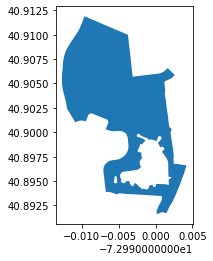

time: 165 ms (started: 2021-12-09 20:51:15 +00:00)


In [172]:
# state_cb.iloc[state_cb['parcelNumAddr'].idxmax()] # GEOID = 361031583151007
state_cb[state_cb['GEOID'] == '361031583151007'].plot()

<AxesSubplot:>

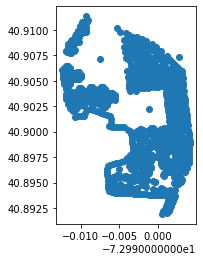

time: 518 ms (started: 2021-12-09 20:31:53 +00:00)


In [171]:
state_geodf[state_geodf['cbg'] == "361031583151"].plot()

# Percentage of diff_cbg for 2 spatial joins: point (lat, lon) in polygon (census block geometry) -- e.g. VT diff_cbg = 14.54%, vs polygon (parcel geometry) in polygon (census block geometry)

In [279]:
from subprocess import getoutput

statefips = '33'
state_jsons = None
for statefips, abbr in [('33', 'nh')]:
    state_abbrv = abbr.lower()
    state_jsons = getoutput(f'ls /home/nhat/regrid-bucket/{state_abbrv}_*.zip').split()
state_jsons

['/home/nhat/regrid-bucket/nh_belknap.geojson.zip',
 '/home/nhat/regrid-bucket/nh_carroll.geojson.zip',
 '/home/nhat/regrid-bucket/nh_cheshire.geojson.zip',
 '/home/nhat/regrid-bucket/nh_coos.geojson.zip',
 '/home/nhat/regrid-bucket/nh_grafton.geojson.zip',
 '/home/nhat/regrid-bucket/nh_hillsborough.geojson.zip',
 '/home/nhat/regrid-bucket/nh_merrimack.geojson.zip',
 '/home/nhat/regrid-bucket/nh_rockingham.geojson.zip',
 '/home/nhat/regrid-bucket/nh_strafford.geojson.zip',
 '/home/nhat/regrid-bucket/nh_sullivan.geojson.zip']

time: 524 ms (started: 2021-12-13 22:47:43 +00:00)


In [280]:
state_df = [] # 4 min read
for jsonl in state_jsons:
    df = gp.read_file(jsonl) 
    if not df.empty:
        df = df[['census_blockgroup', 'lbcs_function', 'lat', 'lon', 'address', 'geometry']].copy()
        df = df.rename(columns={'census_blockgroup': 'cbg', 'lbcs_function': 'func'})
        df['cbg'] = df['cbg'].astype(str).str.zfill(BLOCKGROUP_FIPS_LENGTH)
        df['func'] = (df['func'].fillna(0) // 1000).astype(int)
        state_df.append(df)
        
state_df = pd.concat(state_df)
print(f"{state_df.shape=}")

state_df.shape=(764681, 6)
time: 9min 17s (started: 2021-12-13 22:48:10 +00:00)


In [281]:
tiger_url = "https://www2.census.gov/geo/tiger/TIGER2019/TABBLOCK/tl_2019_{}_tabblock10.zip".format(statefips) 
print(f'Reading Tiger shp {statefips=} {STATE_FIPS_DICT_52[statefips]=}')
state_cb = gp.read_file(tiger_url)
state_cb = state_cb[['GEOID10', 'geometry']]
state_cb = state_cb.rename({"GEOID10": "GEOID"}, axis = 1)
state_cb['cbg'] = state_cb['GEOID'].str[:BLOCKGROUP_FIPS_LENGTH]
print(f"{state_cb.shape=}")


Reading Tiger shp statefips='33' STATE_FIPS_DICT_52[statefips]='NH'
state_cb.shape=(48837, 3)
time: 3.31 s (started: 2021-12-13 22:57:28 +00:00)


In [283]:
# point in polygon
state_df_point = state_df[['cbg', 'lat', 'lon', 'func', 'address']].copy()
state_df_point = gp.GeoDataFrame(state_df_point, geometry=gp.points_from_xy(state_df_point.lon, state_df_point.lat, crs=state_cb.crs)) 
state_df_point = gp.sjoin(state_df_point, state_cb, how='left', predicate='within')

# DISOWNED PARCELS: parcels with (lat, lon) not found within state boundaries i.e. parcels w/o GEOID!
disowned_parcels = state_df_point['GEOID'].isnull().sum() # 12
print(f"Number of disowned parcels: {disowned_parcels=}, {(disowned_parcels/state_df_point.shape[0] * 100) :.5f}%")
# DIFF_CBG
diff_pointIP_cbg = state_df_point.loc[ state_df_point['cbg_left'] != state_df_point['cbg_right']]
print(f"Percentage of diff_cbg: {(diff_pointIP_cbg.shape[0] / len(state_df_point) * 100):.2f} %")


Number of disowned parcels: disowned_parcels=42, 0.00549%
Percentage of diff_cbg: 0.23 %
time: 48.4 s (started: 2021-12-13 22:58:33 +00:00)


## Poly in poly

In [284]:
def max_area_attr_join(left_df, right_df, id_col, attribute_col):
    # IMPORTANT: for setting new id col to work!
    # left_df as the original gdf
    left_df = left_df.reset_index(drop=True)
    left_df[id_col] = left_df.index

    # attribute_col as the desired categorical output (from right_df) for each row (i.e. each ID) in left_df
    # spatial overlay # https://geopandas.org/en/stable/docs/user_guide/set_operations.html#keep-geom-type-keyword
    overlay = gp.overlay(left_df, right_df, how = 'intersection') 
    # to get area, overlay needs to have projected crs (vt_cb.crs = EPSG:4269 doesnt work)
    overlay = overlay.to_crs(crs = "EPSG:3857") 
    overlay['area'] = overlay.area

    # map id_col - max overlapping area
    groupby = overlay.groupby(id_col)[['area']].max()
    #add the column 'area' to the original gdf.
    left_df = left_df.merge(groupby, left_on = id_col, right_index = True) 

    # drop extraneous columns from the joined gdf, keep the attribute_col
    overlay = overlay[[id_col, attribute_col]].copy()

    #merge the attribute column to the original gdf.
    left_df = left_df.merge(overlay, on = id_col)
    left_df['cbg_right'] = left_df['GEOID'].astype(str).str[:BLOCKGROUP_FIPS_LENGTH]
    left_df = left_df.rename(columns={'cbg': 'cbg_left'})
    
    return left_df[['lat', 'lon', 'func', 'address' , 'GEOID', 'cbg_left', 'cbg_right']].copy()


time: 901 µs (started: 2021-12-13 22:59:22 +00:00)


In [285]:
# poly in polygon
id_col = 'parcel_id'
attribute_col = 'GEOID'
state_df = state_df.set_crs(state_cb.crs, allow_override=True)
state_df_polygon = max_area_attr_join(state_df, state_cb, id_col, attribute_col)

time: 6min 58s (started: 2021-12-13 22:59:22 +00:00)


In [286]:
# DISOWNED PARCELS: parcels with (lat, lon) not found within state boundaries i.e. parcels w/o GEOID!
disowned_parcels = state_df_polygon['GEOID'].isnull().sum() # 12
print(f"Number of disowned parcels: {disowned_parcels=}, {(disowned_parcels/state_df_polygon.shape[0] * 100) :.5f}%")
# DIFF_CBG
diff_polyIP_cbg = state_df_polygon.loc[ state_df_polygon['cbg_left'] != state_df_polygon['cbg_right']]
print(f"Percentage of diff_cbg: {(diff_polyIP_cbg.shape[0] / len(state_df_polygon) * 100):.2f} %")

Number of disowned parcels: disowned_parcels=0, 0.00000%
Percentage of diff_cbg: 4.65 %
time: 264 ms (started: 2021-12-13 23:06:20 +00:00)


In [ ]:
## WHY IS THIS DIFFERENCE BETWEEN readfile(zip) and read_json(jq processed jsons)????? 
## ALSO: polygon in polygon: why diff_cbg != 0??
##    maybe: REGRID does largest-overlapse joining between parcels and CENSUS BLOCK GROUP? (here I join largest-overlapse between parcels and CENSUS BLOCK)!

# VERMONT
# # geopandas.readfile(zip)
# Number of disowned parcels: disowned_parcels=12, 0.00356%
# Percentage of diff_cbg: 0.11 %
# v.s. 
# # pandas.read_json(jq processed jsons)
# Number of disowned parcels: disowned_parcels=6, 0.00188%
# Percentage of diff_cbg: 14.54 %
# # poly in poly
# Number of disowned parcels: disowned_parcels=0, 0.00000%
# Percentage of diff_cbg: 6.59 %

## NEW HAMSHIRE
# # geopandas.readfile(zip)
# Number of disowned parcels: disowned_parcels=42, 0.00549%
# Percentage of diff_cbg: 0.23 %
# # pandas.read_json(jq processed jsons)
# Number of disowned parcels: disowned_parcels=40, 0.00531%
# Percentage of diff_cbg: 4.15 %
# # polygon in polygon
# Number of disowned parcels: disowned_parcels=0, 0.00000%
# Percentage of diff_cbg: 4.65 %

### TESTING overlay

In [ ]:
from shapely import geometry

In [167]:
fake_census = gp.GeoDataFrame([
    {'block': 'Block A', 'geometry': geometry.box(1, 0, 4, 4)},
    {'block': 'Block B', 'geometry': geometry.box(4, 0, 7, 4)}
])

fake_buildings = gp.GeoDataFrame([
    {'building': 'Building 1', 'geometry': geometry.box(1, 0, 2, 1)},
    {'building': 'Building 2', 'geometry': geometry.box(3, 1, 6, 3)},
    {'building': 'Building 3', 'geometry': geometry.box(0, 3, 2, 5)},
])

overlaybd = gp.overlay(fake_census, fake_buildings)
overlaybd

,block,building,geometry
0,Block A,Building 1,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2...."
1,Block A,Building 2,"POLYGON ((4.00000 1.00000, 3.00000 1.00000, 3...."
2,Block B,Building 2,"POLYGON ((4.00000 3.00000, 6.00000 3.00000, 6...."
3,Block A,Building 3,"POLYGON ((1.00000 4.00000, 2.00000 4.00000, 2...."


time: 24.2 ms (started: 2021-12-13 20:30:32 +00:00)


In [168]:
overlaybd['area'] = overlaybd.area
overlaybd = overlaybd.sort_values('area', ascending=False)

time: 2.86 ms (started: 2021-12-13 20:30:56 +00:00)


<AxesSubplot:>

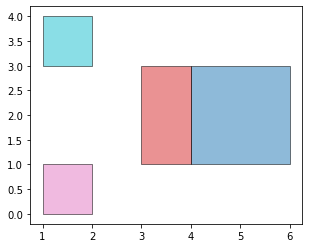

time: 95.6 ms (started: 2021-12-13 20:45:06 +00:00)


In [186]:
overlaybd.plot(alpha=0.5, edgecolor='k', cmap='tab10')

In [169]:
overlaybd.groupby('building').first()

,block,geometry,area
building,,,
Building 1,Block A,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",1.0
Building 2,Block B,"POLYGON ((4.00000 3.00000, 6.00000 3.00000, 6....",4.0
Building 3,Block A,"POLYGON ((1.00000 4.00000, 2.00000 4.00000, 2....",1.0


time: 9.88 ms (started: 2021-12-13 20:31:02 +00:00)
